In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix


In [2]:
df=pd.read_csv('./model_data/new_features_final_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Bulk_Density,CEC,Clay_Content,Coarse_Fragments,Dist_Fault,Dist_River,Dist_Road,Geology_Nepal_ID,Geology_geo8apg_ID,...,rainfall_360d,rainfall_7d,slope,longitude,latitude,landslide,TPI,TRI,SPI,TWI
0,0,116.0,213.0,265.0,187.0,40263.824226,1098.236149,326.199257,021,0,...,1379.121476,78.515526,12.952645,87.055222,27.167781,1,NaN,NaN,339.706756,8.767454
1,1,128.0,192.0,319.0,151.0,53522.568900,403.040295,21.699836,014,2482,...,1152.362714,58.057973,12.903676,85.143062,27.878121,1,NaN,NaN,135.167878,7.853728
2,2,123.0,179.0,236.0,150.0,21660.366870,610.047647,204.894367,030,0,...,1109.636198,54.176671,19.695829,87.322163,26.985606,1,-373.4,442.939386,286.017803,7.710668
3,3,121.0,221.0,207.0,188.0,45012.970393,126.757831,684.829912,030,2375,...,1030.269276,42.281708,16.900137,85.343049,28.182690,1,510.6,448.911795,463.030596,8.520394
4,4,115.0,200.0,187.0,184.0,26669.456690,614.635906,476.066893,010,0,...,1649.654551,18.224739,21.842949,83.405823,28.101232,1,87.0,706.127467,590.038317,8.208567


In [4]:
df.shape

(1066, 31)

In [5]:
df.isnull().sum()

Unnamed: 0             0
Bulk_Density           0
CEC                    0
Clay_Content           0
Coarse_Fragments       0
Dist_Fault             0
Dist_River             0
Dist_Road              0
Geology_Nepal_ID       0
Geology_geo8apg_ID     0
LULC                   0
NDVI                   0
Nitrogen               0
Sand_Content           0
Silt_Content           0
Soil_Organic_Carbon    0
Soil_pH                0
aspect                 0
date                   0
elevation              0
precipitation          0
rainfall_360d          0
rainfall_7d            0
slope                  0
longitude              0
latitude               0
landslide              0
TPI                    4
TRI                    4
SPI                    0
TWI                    0
dtype: int64

In [6]:
df[df['TWI']>9999]

,Unnamed: 0,Bulk_Density,CEC,Clay_Content,Coarse_Fragments,Dist_Fault,Dist_River,Dist_Road,Geology_Nepal_ID,Geology_geo8apg_ID,...,rainfall_360d,rainfall_7d,slope,longitude,latitude,landslide,TPI,TRI,SPI,TWI
240,240,140.0,144.0,225.0,104.0,21804.229865,83.343162,653.662075,028,0,...,1922.070294,195.877031,0.0,80.595000,28.694000,1,-761.0,700.820234,0.0,inf
390,390,126.0,192.0,223.0,163.0,42265.233452,52.691043,486.813125,026,2482,...,2301.564156,89.135830,0.0,84.090700,28.160500,1,-386.6,658.558502,0.0,inf
486,486,121.0,210.0,248.0,183.0,44896.311071,441.685168,809.890938,026,2482,...,2129.442152,117.159546,0.0,83.942200,28.291200,1,205.6,212.262338,0.0,inf
539,539,140.0,166.0,218.0,86.0,22718.943848,483.372660,3.611608,028,0,...,1297.686119,0.000000,0.0,81.382869,28.192038,0,-1616.4,1489.548690,0.0,inf
936,936,128.0,156.0,165.0,77.0,5481.477740,159.488233,2579.816007,028,0,...,2023.866817,59.371727,0.0,86.996189,26.708821,0,-2334.0,2175.555446,0.0,inf
1009,1009,141.0,195.0,284.0,63.0,27460.696384,188.199680,400.369235,028,0,...,1297.731808,2.679726,0.0,86.227293,26.617863,0,-1566.2,1718.005151,0.0,inf


In [7]:
df[df['slope']==0]

,Unnamed: 0,Bulk_Density,CEC,Clay_Content,Coarse_Fragments,Dist_Fault,Dist_River,Dist_Road,Geology_Nepal_ID,Geology_geo8apg_ID,...,rainfall_360d,rainfall_7d,slope,longitude,latitude,landslide,TPI,TRI,SPI,TWI
240,240,140.0,144.0,225.0,104.0,21804.229865,83.343162,653.662075,028,0,...,1922.070294,195.877031,0.0,80.595000,28.694000,1,-761.0,700.820234,0.0,inf
390,390,126.0,192.0,223.0,163.0,42265.233452,52.691043,486.813125,026,2482,...,2301.564156,89.135830,0.0,84.090700,28.160500,1,-386.6,658.558502,0.0,inf
486,486,121.0,210.0,248.0,183.0,44896.311071,441.685168,809.890938,026,2482,...,2129.442152,117.159546,0.0,83.942200,28.291200,1,205.6,212.262338,0.0,inf
539,539,140.0,166.0,218.0,86.0,22718.943848,483.372660,3.611608,028,0,...,1297.686119,0.000000,0.0,81.382869,28.192038,0,-1616.4,1489.548690,0.0,inf
936,936,128.0,156.0,165.0,77.0,5481.477740,159.488233,2579.816007,028,0,...,2023.866817,59.371727,0.0,86.996189,26.708821,0,-2334.0,2175.555446,0.0,inf
1009,1009,141.0,195.0,284.0,63.0,27460.696384,188.199680,400.369235,028,0,...,1297.731808,2.679726,0.0,86.227293,26.617863,0,-1566.2,1718.005151,0.0,inf


In [8]:
columns=df.columns

In [9]:
df.nunique()

Unnamed: 0             1066
Bulk_Density             56
CEC                     213
Clay_Content            186
Coarse_Fragments        220
Dist_Fault             1057
Dist_River             1057
Dist_Road              1057
Geology_Nepal_ID         50
Geology_geo8apg_ID       69
LULC                      8
NDVI                   1053
Nitrogen                966
Sand_Content            283
Silt_Content            233
Soil_Organic_Carbon     532
Soil_pH                  21
aspect                 1008
date                    597
elevation               911
precipitation           371
rainfall_360d          1048
rainfall_7d             769
slope                  1048
longitude              1057
latitude               1050
landslide                 2
TPI                    1036
TRI                    1062
SPI                    1057
TWI                    1057
dtype: int64

In [10]:
categorical_columns=['LULC','Geology_Nepal_ID']
numerical_columns=['Bulk_Density',
 'CEC',
 'Clay_Content',
 'Coarse_Fragments',
 'Dist_Fault',
 'Dist_River',
 'Dist_Road',
 'NDVI',
 'Nitrogen',
 'Sand_Content',
 'Silt_Content',
 'Soil_Organic_Carbon',
 'Soil_pH',
 'aspect',
 'elevation',
 'precipitation',
 'rainfall_360d',
 'rainfall_7d',
 'slope',
 'TPI',
 'TRI',
 'SPI',
 'TWI']
target_column=['landslide']

In [11]:
numerical_columns

['Bulk_Density',
 'CEC',
 'Clay_Content',
 'Coarse_Fragments',
 'Dist_Fault',
 'Dist_River',
 'Dist_Road',
 'NDVI',
 'Nitrogen',
 'Sand_Content',
 'Silt_Content',
 'Soil_Organic_Carbon',
 'Soil_pH',
 'aspect',
 'elevation',
 'precipitation',
 'rainfall_360d',
 'rainfall_7d',
 'slope',
 'TPI',
 'TRI',
 'SPI',
 'TWI']

In [12]:
GEOLOGY_NEPAL_ID=df['Geology_Nepal_ID'].unique()

In [13]:
def clean_data_inconsistencies(df):
    df=df[df['TWI']<=9999]
    df.dropna(inplace=True)
    df['Geology_Nepal_ID'] = df['Geology_Nepal_ID'].replace(GEOLOGY_NEPAL_ID, range(len(GEOLOGY_NEPAL_ID)))
    return df

In [14]:
def preprocess_pipeline():
    """Creates and returns a preprocessing pipeline."""
    
    # Pipelines for preprocessing
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),  # First impute missing values
         # Then scale numerical values
        ("scaler", MinMaxScaler())  # Then scale numerical values 
    ])

    categorical_transformer = Pipeline(steps=[
          # Then encode categorical values
        ("encoder", OneHotEncoder(handle_unknown="ignore"))  # Then encode categorical values there are two 'LULC' AND 'Geology_Nepal_ID'
    ])

    # Combine transformers
    preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_transformer, numerical_columns),
        ("cat", categorical_transformer, categorical_columns)
    ])

    return preprocessor

In [15]:
df.info() ## ORIGIONAL DATAFRAME

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1066 non-null   int64  
 1   Bulk_Density         1066 non-null   float64
 2   CEC                  1066 non-null   float64
 3   Clay_Content         1066 non-null   float64
 4   Coarse_Fragments     1066 non-null   float64
 5   Dist_Fault           1066 non-null   float64
 6   Dist_River           1066 non-null   float64
 7   Dist_Road            1066 non-null   float64
 8   Geology_Nepal_ID     1066 non-null   object 
 9   Geology_geo8apg_ID   1066 non-null   object 
 10  LULC                 1066 non-null   int64  
 11  NDVI                 1066 non-null   float64
 12  Nitrogen             1066 non-null   float64
 13  Sand_Content         1066 non-null   float64
 14  Silt_Content         1066 non-null   float64
 15  Soil_Organic_Carbon  1066 non-null   f

In [25]:
## Skip for inference.
df=clean_data_inconsistencies(df)

preprocessor = preprocess_pipeline()
X = df[numerical_columns+categorical_columns]
X.info()
y = df['landslide']
X['Geology_Nepal_ID'].unique()

preprocessed_data=preprocessor.fit_transform(X)

<class 'pandas.core.frame.DataFrame'>
Index: 1056 entries, 2 to 1063
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bulk_Density         1056 non-null   float64
 1   CEC                  1056 non-null   float64
 2   Clay_Content         1056 non-null   float64
 3   Coarse_Fragments     1056 non-null   float64
 4   Dist_Fault           1056 non-null   float64
 5   Dist_River           1056 non-null   float64
 6   Dist_Road            1056 non-null   float64
 7   NDVI                 1056 non-null   float64
 8   Nitrogen             1056 non-null   float64
 9   Sand_Content         1056 non-null   float64
 10  Silt_Content         1056 non-null   float64
 11  Soil_Organic_Carbon  1056 non-null   float64
 12  Soil_pH              1056 non-null   float64
 13  aspect               1056 non-null   float64
 14  elevation            1056 non-null   int64  
 15  precipitation        1056 non-null   float6

In [26]:
df1=df[numerical_columns+categorical_columns]

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1056 entries, 2 to 1063
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bulk_Density         1056 non-null   float64
 1   CEC                  1056 non-null   float64
 2   Clay_Content         1056 non-null   float64
 3   Coarse_Fragments     1056 non-null   float64
 4   Dist_Fault           1056 non-null   float64
 5   Dist_River           1056 non-null   float64
 6   Dist_Road            1056 non-null   float64
 7   NDVI                 1056 non-null   float64
 8   Nitrogen             1056 non-null   float64
 9   Sand_Content         1056 non-null   float64
 10  Silt_Content         1056 non-null   float64
 11  Soil_Organic_Carbon  1056 non-null   float64
 12  Soil_pH              1056 non-null   float64
 13  aspect               1056 non-null   float64
 14  elevation            1056 non-null   int64  
 15  precipitation        1056 non-null   float6

In [28]:
df1.head()

,Bulk_Density,CEC,Clay_Content,Coarse_Fragments,Dist_Fault,Dist_River,Dist_Road,NDVI,Nitrogen,Sand_Content,...,precipitation,rainfall_360d,rainfall_7d,slope,TPI,TRI,SPI,TWI,LULC,Geology_Nepal_ID
2,123.0,179.0,236.0,150.0,21660.366870,610.047647,204.894367,6452.826087,3452.0,377.0,...,18.134924,1109.636198,54.176671,19.695829,-373.4,442.939386,286.017803,7.710668,10,2
3,121.0,221.0,207.0,188.0,45012.970393,126.757831,684.829912,4341.000000,4925.0,447.0,...,0.000000,1030.269276,42.281708,16.900137,510.6,448.911795,463.030596,8.520394,50,2
4,115.0,200.0,187.0,184.0,26669.456690,614.635906,476.066893,6183.869565,3499.0,360.0,...,36.449478,1649.654551,18.224739,21.842949,87.0,706.127467,590.038317,8.208567,10,3
5,131.0,196.0,239.0,130.0,40524.722925,652.506090,485.323578,5186.913043,2384.0,338.0,...,0.000000,2582.574110,215.599369,3.850393,-792.8,638.262642,45.900901,9.223575,40,4
6,95.0,227.0,209.0,256.0,52534.625837,205.643410,9635.993330,6826.521739,7594.0,501.0,...,50.815109,2005.537958,70.891411,36.422114,925.8,651.493054,1806.280069,8.107028,10,5


X[0]

In [29]:
import joblib
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [30]:
y

2       1
3       1
4       1
5       1
6       1
       ..
1059    0
1060    0
1061    0
1062    0
1063    0
Name: landslide, Length: 1056, dtype: int64

In [31]:
preprocessed_data[0]

array([0.65      , 0.33711048, 0.544     , 0.37572254, 0.26123995,
       0.17673483, 0.01142131, 0.80458634, 0.16985469, 0.41751527,
       0.47175141, 0.13249211, 0.25      , 0.31778744, 0.10811209,
       0.05486868, 0.25103621, 0.13235375, 0.27496838, 0.41869017,
       0.11954794, 0.02046532, 0.35573032, 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Ensure preprocessed_data is in CSR sparse format
X = csr_matrix(preprocessed_data)
y = y.values  # Target variable

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

# Function to train and evaluate a model
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) 

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    return model

# Train Logistic Regression
log_reg = train_and_evaluate_model(LogisticRegression(max_iter=1000), "Logistic Regression")

# Train Random Forest
rf_model = train_and_evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest")

# Train XGBoost
xgb_model = train_and_evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "XGBoost")

## train decision tree 
dt_model = train_and_evaluate_model(DecisionTreeClassifier(criterion='log_loss'), "Decision Tree")



Logistic Regression Performance:
Accuracy: 0.8443
Precision: 0.8621
Recall: 0.8547
F1-score: 0.8584

Random Forest Performance:
Accuracy: 0.8349
Precision: 0.8661
Recall: 0.8291
F1-score: 0.8472

XGBoost Performance:
Accuracy: 0.8443
Precision: 0.8750
Recall: 0.8376
F1-score: 0.8559

Decision Tree Performance:
Accuracy: 0.7736
Precision: 0.8224
Recall: 0.7521
F1-score: 0.7857


/opt/miniconda3/envs/ml/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [10:51:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


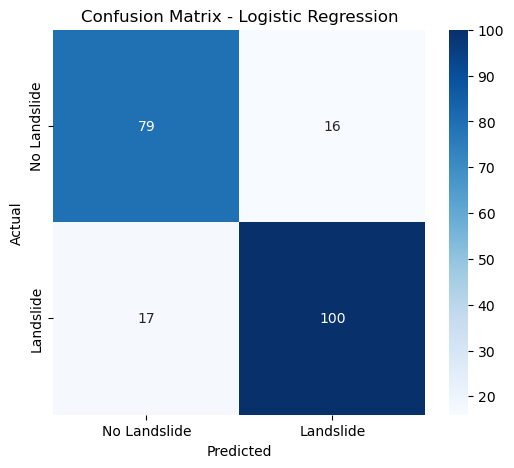

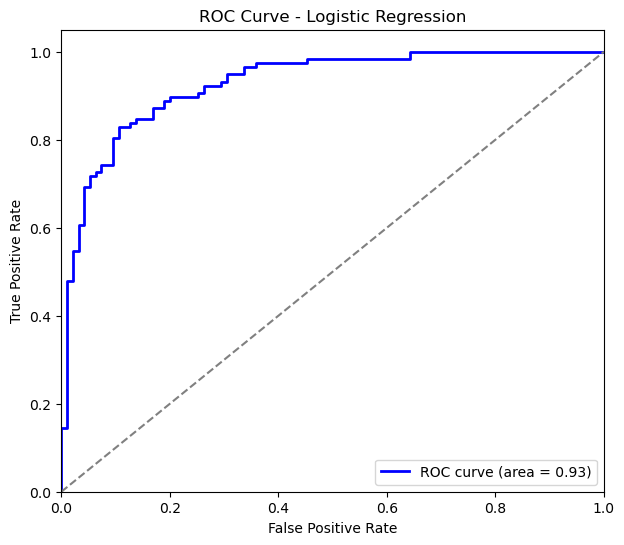

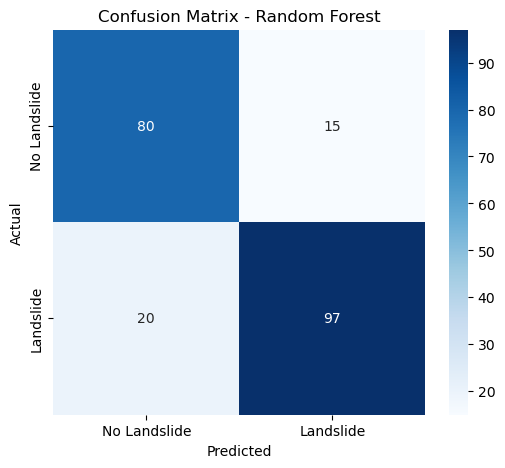

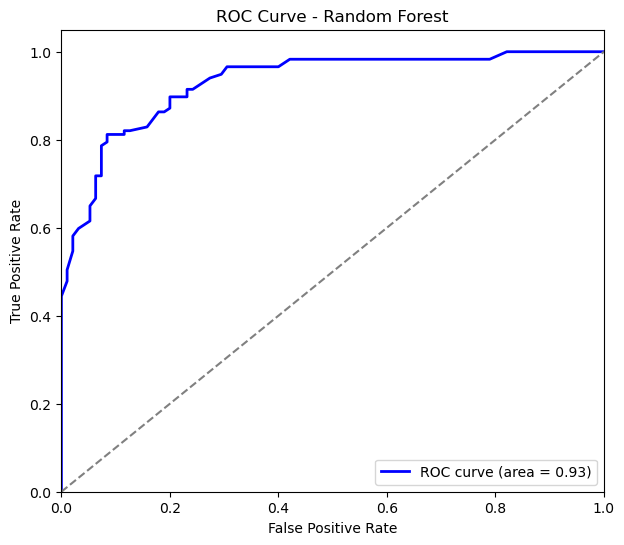

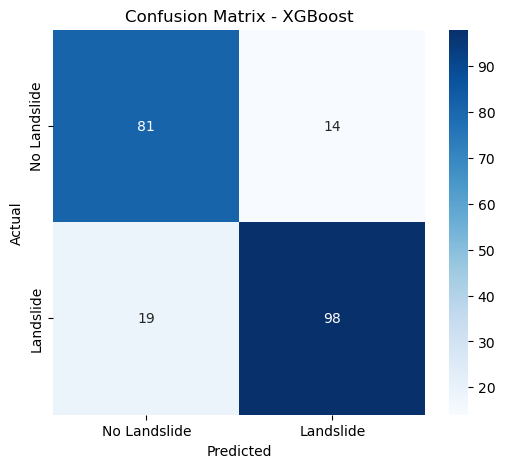

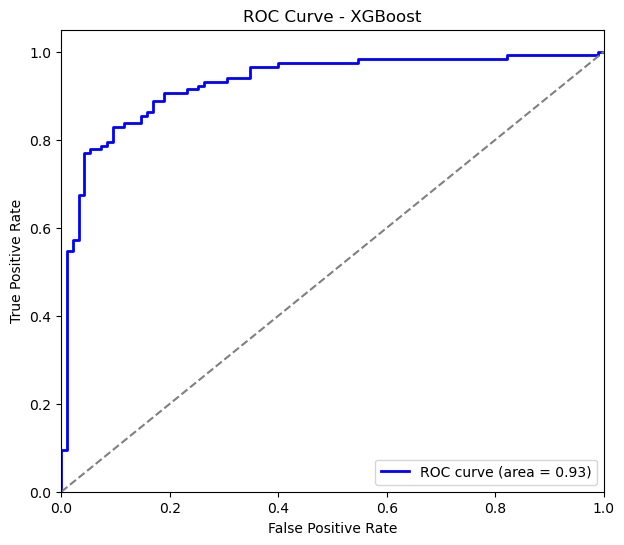

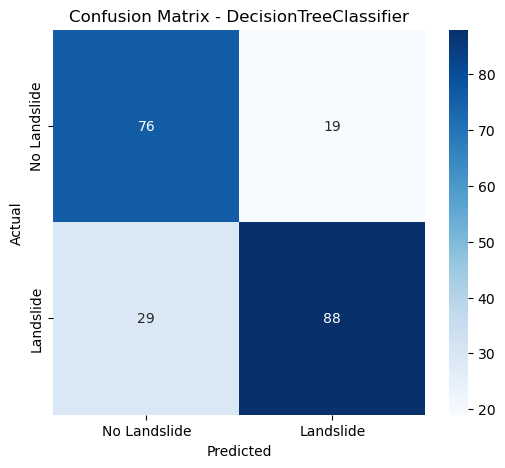

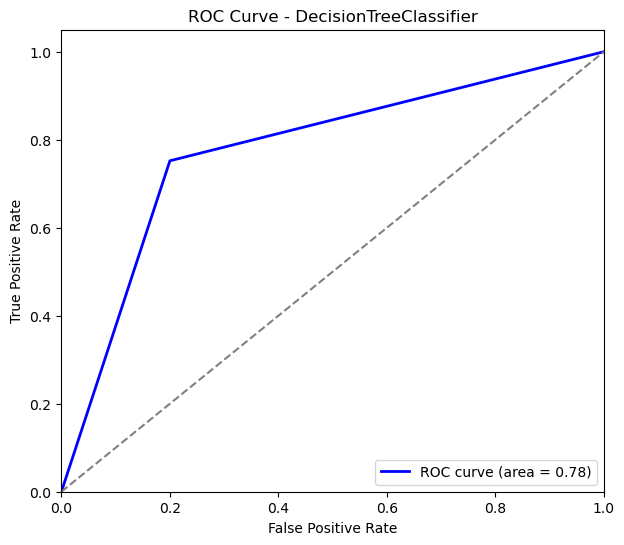

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Landslide", "Landslide"], yticklabels=["No Landslide", "Landslide"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Function to plot ROC Curve
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.show()

# Evaluate models and plot visuals
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    'DecisionTreeClassifier':dt_model
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Plot ROC curve
    plot_roc_curve(y_test, y_pred_prob, model_name)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples

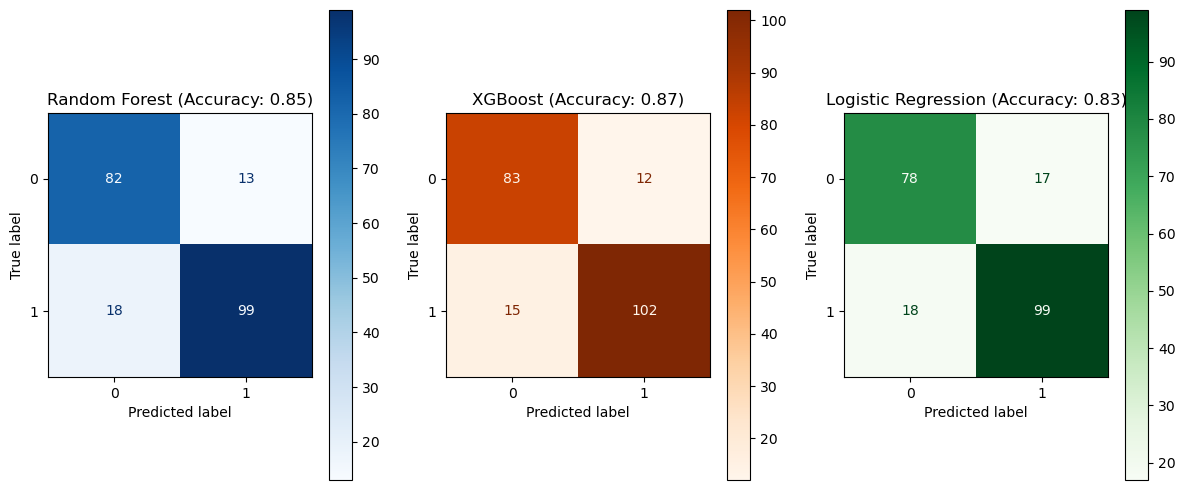

In [37]:
import joblib
# Define parameter grid for Random Forest
rf_param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [10, 20, None],  # Tree depth
    "min_samples_split": [2, 5, 10],  # Minimum samples per split
    "min_samples_leaf": [1, 2, 4],  # Minimum samples per leaf
}

# Define parameter grid for XGBoost
xgb_param_grid = {
    "n_estimators": [50, 100, 200],  # Number of boosting rounds
    "max_depth": [3, 6, 10],  # Tree depth
    "learning_rate": [0.01, 0.1, 0.2],  # Step size shrinkage
    "subsample": [0.7, 1],  # Fraction of samples used per tree
}
log_reg_param_grid = {
    "C": [0.1, 1, 10],  # Regularization strength
    "max_iter": [300, 500, 2000],  # Maximum iterations

}

# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              cv=5, scoring="accuracy", n_jobs=-1, verbose=2)

rf_grid_search.fit(X_train, y_train)

# Perform Grid Search for XGBoost
xgb_grid_search = GridSearchCV(XGBClassifier(eval_metric="logloss", random_state=42),
                               param_grid=xgb_param_grid,
                               cv=5, scoring="accuracy", n_jobs=-1, verbose=2)

xgb_grid_search.fit(X_train, y_train)

# Perform Grid Search for Logistic Regression
log_reg_grid_search = GridSearchCV(LogisticRegression(random_state=42),
                                   param_grid=log_reg_param_grid,
                                   cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
log_reg_grid_search.fit(X_train, y_train)

# Get the best models
best_rf_model = rf_grid_search.best_estimator_
best_xgb_model = xgb_grid_search.best_estimator_
best_log_reg_model = log_reg_grid_search.best_estimator_

# Print the best parameters
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best XGBoost Parameters:", xgb_grid_search.best_params_)
print("Best Logistic Regression Parameters:", log_reg_grid_search.best_params_)

# Save the best models
joblib.dump(best_rf_model, "best_random_forest.pkl")
joblib.dump(best_xgb_model, "best_xgboost.pkl")
joblib.dump(best_log_reg_model, "best_logistic_regression.pkl")
print("Best models saved successfully!")

# =====================
# Testing and Visualization
# =====================

# Evaluate the models
rf_predictions = best_rf_model.predict(X_test)
xgb_predictions = best_xgb_model.predict(X_test)
log_reg_predictions = best_log_reg_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)

print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, log_reg_predictions))

# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test, ax=axes[0], cmap="Blues")
axes[0].set_title(f"Random Forest (Accuracy: {rf_accuracy:.2f})")

ConfusionMatrixDisplay.from_estimator(best_xgb_model, X_test, y_test, ax=axes[1], cmap="Oranges")
axes[1].set_title(f"XGBoost (Accuracy: {xgb_accuracy:.2f})")

ConfusionMatrixDisplay.from_estimator(best_log_reg_model, X_test, y_test, ax=axes[2], cmap="Greens")
axes[2].set_title(f"Logistic Regression (Accuracy: {log_reg_accuracy:.2f})")


plt.tight_layout()
plt.show()

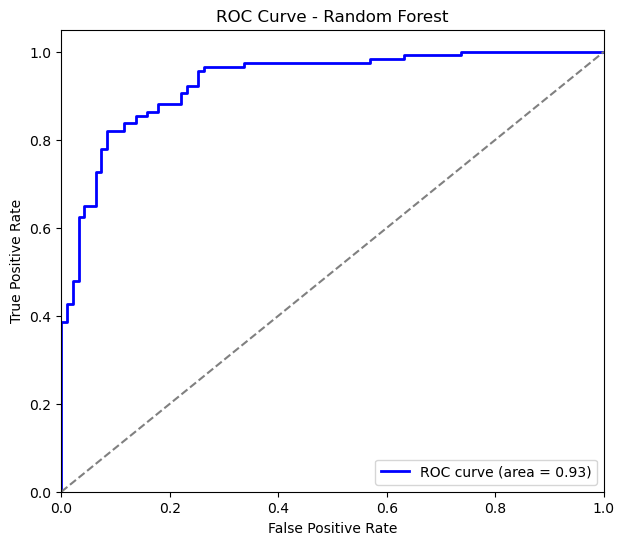

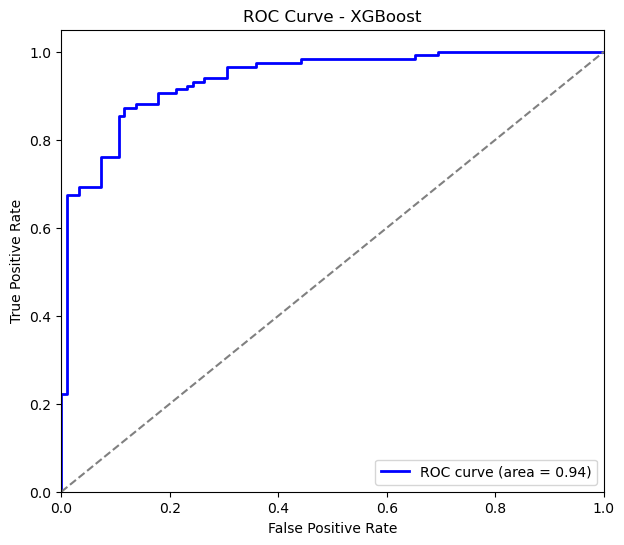

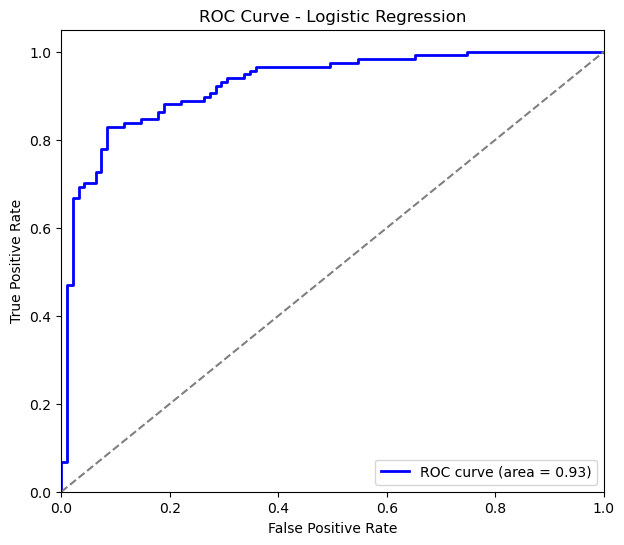

In [38]:
plot_roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1], "Random Forest")
plot_roc_curve(y_test, best_xgb_model.predict_proba(X_test)[:, 1], "XGBoost")
plot_roc_curve(y_test, best_log_reg_model.predict_proba(X_test)[:, 1], "Logistic Regression")

In [114]:
## So we will use the best model which is XGBoost for inference.


In [115]:

import skl2onnx
import onnxmltools
import matplotlib.pyplot as plt
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier



# Train best Random Forest model
best_rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
best_rf_model.fit(X_train, y_train)

# Train best XGBoost model
best_xgb_model = XGBClassifier(n_estimators=100, max_depth=6, eval_metric="logloss", random_state=42)
best_xgb_model.fit(X_train, y_train)

# Define input shape (Number of features)
initial_type = [("float_input", FloatTensorType([None, X_train.shape[1]]))]

# Convert Random Forest to ONNX
rf_onnx = convert_sklearn(best_rf_model, initial_types=initial_type)
onnxmltools.utils.save_model(rf_onnx, "best_random_forest.onnx")
print("Random Forest model saved in ONNX format!")

# Convert XGBoost to ONNX
xgb_onnx = onnxmltools.convert_xgboost(best_xgb_model, initial_types=initial_type)
onnxmltools.utils.save_model(xgb_onnx, "best_xgboost.onnx")
print("XGBoost model saved in ONNX format!")

Random Forest model saved in ONNX format!
XGBoost model saved in ONNX format!
